

* Nama Lengkap : Fajar Maulana Thaariq A
* Username : alburuuj
* Email : fajarm643@gmail.com
* No Telp : +6289619785254
* Kota Domisili : Kab. Semarang
* Tempat Lahir : Kab. Boyolali
* Tanggal Lahir : 30 Juni 2001
* Pendidikan Terakhir : SMA
* Pekerjaan / Profesi saat ini : Pelajar / Mahasiswa
* Perusahaan/ Institusi saat ini : Institut Teknologi Telkom Purwokerto







In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score

In [3]:
buku = pd.read_csv('/content/Books.csv')
buku

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
rating = pd.read_csv('/content/Ratings.csv')
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


# Data Understanding

Mencatat data - data variable yang tersedia di dalam dataset



1.   Books
  * ISBN : Kode unik dari identitas sebuah buku
  * Book-Title : Judul dari buku
  * Book-Author : Penulis atau Pengarang buku
  * Year-of-Publication : Tahun diterbitkannya buku
  * Publisher : Penerbit Buku
  * Image-URL-S : Tautan Link sampul buku (kecil)
  * Image-URL-M : Tautan link sampul buku (Sedang)
  * Image-URL-L : Tautan link sampul buku (Besar)


2.   Ratings
  * User-ID : Nomor identitas pengguna
  * ISBN : Kode unik dari identitas sebuah buku
  * Book-Rating : Skor penilaian dari masing - masing buku





# Checking Data Information

In [5]:
buku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
daftar_buku = buku['Book-Title'].value_counts().keys()
total = buku['Book-Title'].value_counts()

book_count = pd.DataFrame({'Judul Buku': daftar_buku, 'Total': total}).reset_index(drop=True)
book_count

,Judul Buku,Total
0,Selected Poems,27
1,Little Women,24
2,Wuthering Heights,21
3,The Secret Garden,20
4,Dracula,20
...,...,...
242130,What Every Kid Should Know,1
242131,The Seventh Enemy (A Brady Coyne Mystery),1
242132,A Brace of Skeet,1
242133,"The Yellow Admiral (O'Brian, Patrick, Aubrey/M...",1


In [7]:
daftar_pengarang = buku['Book-Author'].value_counts().keys()
total = buku['Book-Author'].value_counts()

author_count = pd.DataFrame({'Pengarang': daftar_pengarang, 'Total': total}).reset_index(drop=True)
author_count

,Pengarang,Total
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373
...,...,...
102018,Linda Jackson,1
102019,Artiste C. Arthur,1
102020,Emily Pearl Kingsley,1
102021,Jean Cassels,1


In [8]:
print('Total missing value in dataframe:', buku.isnull().sum().sum(), 'records')

Total missing value in dataframe: 6 records


In [9]:
buku.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Diketahui bahwa terdapat nilai kosong yang berada pada kolom Book-Autor, Publisher, dan Image-URL-L

In [10]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
daftar_nilai = rating['Book-Rating'].value_counts().keys()
total = rating['Book-Rating'].value_counts()

rating_count = pd.DataFrame({'Penilaian': daftar_nilai, 'Total': total}).reset_index(drop=True)
rating_count

,Penilaian,Total
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


**Checking Missing Value on Ratings.csv**

In [12]:
print('Total missing value in dataframe:', rating.isnull().sum().sum(), 'records')

Total missing value in dataframe: 0 records


Dihasilkan bahwa data rating tidak memiliki nilai yang kosong

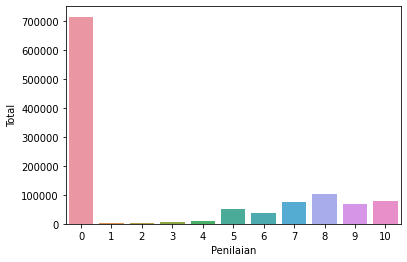

In [13]:
sns.barplot(data=rating_count, x='Penilaian', y='Total')
plt.show()

Grafik visualisasi diatas menunjukkan bahwa skla rating terdiri dari nilai 0 sampai 10.

# Checking Duplicating on Data

In [14]:
for col in buku.columns:
  print(f'{col}: {buku[col].duplicated().sum()}')

ISBN: 0
Book-Title: 29225
Book-Author: 169336
Year-Of-Publication: 271158
Publisher: 254552
Image-URL-S: 316
Image-URL-M: 316
Image-URL-L: 318


Dari 8 kolom yang tersedia, Kolom ISBN sendiri yang tidak memiliki duplikasi data. Berbeda dengan kolom yang lain yang memiliki duplikasi yang berbeda - beda

In [15]:
for col in rating.columns:
  print(f'{col}: {rating[col].duplicated().sum()}')

User-ID: 1044497
ISBN: 809224
Book-Rating: 1149769


Pada data Ratings.csv semua kolom memiliki duplikasi dengan nilai yang berbeda - beda

# Content Based Filltering
---
## Data Preparation

**Menghilangkan kolom yang tidak diperlukan**
Untuk pembuatan sistem rekomendasi ini, diperlukan data dari author (Pengarang) dan rating (Penilaian) sebagai acuan dalam pembuatan model. selanjutnya, untuk kolom yang tidak lagi diperlukan akan kita hapus sehinnga tidak mengganggu ketia per modelan sedang berlangsung.




In [16]:
unused_columns = ['Year-Of-Publication', 'Publisher', 'Image-URL-M', 'Image-URL-L']
buku.drop(unused_columns, axis=1, inplace=True)
buku

,ISBN,Book-Title,Book-Author,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,http://images.amazon.com/images/P/0192126040.0...


# Data Aggregation

Penggabungan data dari data buku dan juga data rating

In [17]:
rating_new = rating.merge(buku,on='ISBN')
rating_new = rating_new.groupby('Book-Title').sum()['Book-Rating'].reset_index()
rating_new.rename(columns={'Book-Rating':'Num-Ratings'}, inplace=True)

In [18]:
book_new = pd.DataFrame({'Book-Title': buku['Book-Title'].unique()})
book_new = pd.merge(book_new, rating_new, on='Book-Title', how='left')
book_new = book_new.merge(buku, on='Book-Title').drop_duplicates('ISBN')

In [19]:
book_new

,Book-Title,Num-Ratings,ISBN,Book-Author,Image-URL-S
0,Classical Mythology,7.0,0195153448,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,Classical Mythology,7.0,0801319536,Mark P. O. Morford,http://images.amazon.com/images/P/0801319536.0...
2,Clara Callan,69.0,0002005018,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
3,Decision in Normandy,15.0,0060973129,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
4,Flu: The Story of the Great Influenza Pandemic...,47.0,0374157065,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
...,...,...,...,...,...
271355,Flashpoints: Promise and Peril in a New World,5.0,0449906736,Robin Wright,http://images.amazon.com/images/P/0449906736.0...
271356,From One to One Hundred,4.0,0525447644,Teri Sloat,http://images.amazon.com/images/P/0525447644.0...
271357,Lily Dale : The True Story of the Town that Ta...,0.0,006008667X,Christine Wicker,http://images.amazon.com/images/P/006008667X.0...
271358,Republic (World's Classics),0.0,0192126040,Plato,http://images.amazon.com/images/P/0192126040.0...


In [20]:
rating_new

,Book-Title,Num-Ratings
0,A Light in the Storm: The Civil War Diary of ...,9
1,Always Have Popsicles,0
2,Apple Magic (The Collector's series),0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8
4,Beyond IBM: Leadership Marketing and Finance ...,0
...,...,...
241066,Ã?Â?lpiraten.,0
241067,Ã?Â?rger mit Produkt X. Roman.,21
241068,Ã?Â?sterlich leben.,7
241069,Ã?Â?stlich der Berge.,8


## Menghilangkan Duplikasi Data

In [21]:
book_new = book_new.drop_duplicates('Book-Title').reset_index(drop=True)
len(book_new['ISBN'].unique()), len(book_new['Book-Title'].unique())

(242135, 242135)

## Checking Missing Values

In [22]:
book_new.isnull().sum()

Book-Title        0
Num-Ratings    1064
ISBN              0
Book-Author       1
Image-URL-S       0
dtype: int64

Kolom Num-Ratings dan Book-Author masih terdapat nilai yang kosong

## Mengatasi Missing Values

In [23]:
book_new = book_new.dropna()
book_new.shape

(241070, 5)

## Checking Missing Values Again

In [24]:
book_new.isnull().sum()

Book-Title     0
Num-Ratings    0
ISBN           0
Book-Author    0
Image-URL-S    0
dtype: int64

Dari hasil daiatas, diketahui bahwa sudah tidak ada lagi kolom yang memiliki nilai kosong

## Data Selection
Melakukan seleksi data dari data yang akan digunakan selanjutnya. data yang digunakan memiliki kriteria penilaian diatas skor 60

In [25]:
book_final = book_new[book_new['Num-Ratings'] > 60]
book_final.drop(['ISBN', 'Num-Ratings'], axis=1, inplace=True)
book_final

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Book-Title,Book-Author,Image-URL-S
1,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
5,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...
14,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,http://images.amazon.com/images/P/1558746218.0...
18,The Testament,John Grisham,http://images.amazon.com/images/P/0440234743.0...
19,Beloved (Plume Contemporary Fiction),Toni Morrison,http://images.amazon.com/images/P/0452264464.0...
...,...,...,...
119688,Kids are Punny : Jokes Sent by Kids to the Ros...,Rosie O'Donnell,http://images.amazon.com/images/P/0446523232.0...
120883,Forever Blue,Suzanne Brockmann,http://images.amazon.com/images/P/1551666804.0...
136915,Contacto,Carl Sagan,http://images.amazon.com/images/P/8401462231.0...
144058,A Letter to Mrs. Roosevelt,C. COCO DE YOUNG,http://images.amazon.com/images/P/0385326335.0...


# Data SElectioan

**TFID Vectorizer**

In [26]:
data = book_final
data.sample(3)

,Book-Title,Book-Author,Image-URL-S
213,All That Remains (Kay Scarpetta Mysteries (Pap...,Patricia D. Cornwell,http://images.amazon.com/images/P/0380718332.0...
38408,The Echo,Minette Walters,http://images.amazon.com/images/P/0399142517.0...
24410,The Macgregors: Daniel-Ian,Nora Roberts,http://images.amazon.com/images/P/0373483902.0...


In [27]:
tfid = TfidfVectorizer(token_pattern=r"(?u)\b\w\w+\b\s+\w+")
tfid.fit(data['Book-Author']) 

tfid.get_feature_names() 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron naparstek',
 'abby bardi',
 'adam davies',
 'adam gopnik',
 'adele faber',
 'adele lang',
 'adeline yen',
 'adrian nicole',
 'adriana trigiana',
 'adriana trigiani',
 'agatha christie',
 'ahdaf soueif',
 'akif pirincci',
 'akiyuki nosaka',
 'al franken',
 'alan alexander',
 'alan dean',
 'alan garner',
 'alan lightman',
 'alan moore',
 'alan paton',
 'alan watts',
 'alastair reynolds',
 'albert  camus',
 'albert b',
 'albert camus',
 'alcoholics anonymous',
 'aldo leopold',
 'aldous huxley',
 'aleksandr solzhenitsyn',
 'alessandro baricco',
 'alex garland',
 'alex haley',
 'alex kava',
 'alex kotlowitz',
 'alexa albert',
 'alexander mccall',
 'alexander solzhenitsyn',
 'alexandra fuller',
 'alexandra ripley',
 'alexandre dumas',
 'alfred bester',
 'alfred lansing',
 'ali smith',
 'alice blanchard',
 'alice borchardt',
 'alice gray',
 'alice hoffman',
 'alice joyce',
 'alice mattison',
 'alice mcdermott',
 'alice munro',
 'alice randall',
 'alice sebold',
 'alice steinbach',
 'a

## Merubah data ke dalam bentuk matriks

In [28]:
tfidf_matrix = tfid.fit_transform(data['Book-Author']) 
tfidf_matrix.shape

(7112, 2424)

In [29]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

## Menghitung Cosine Similarity

In [30]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Book-Title'], columns=data['Book-Title'])
cosine_sim_df

Book-Title,Clara Callan,The Kitchen God's Wife,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),The Testament,Beloved (Plume Contemporary Fiction),Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source,New Vegetarian: Bold and Beautiful Recipes for Every Occasion,Wild Animus,Airframe,Timeline,...,"Test of the Twins (Dragonlance Legends, Vol. 3)",The Manhattan Hunt Club,First Person Plural : My Life As a Multiple,So You Want to Be a Wizard (Young Wizards (Paperback)),"The Lion, the Witch and the Wardrobe (The Chronicles of Narnia)",Kids are Punny : Jokes Sent by Kids to the Rosie O'Donnell Show,Forever Blue,Contacto,A Letter to Mrs. Roosevelt,The Illustrated Alchemist: A Fable About Following Your Dream
Book-Title,,,,,,,,,,,,,,,,,,,,,
Clara Callan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Kitchen God's Wife,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Testament,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beloved (Plume Contemporary Fiction),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kids are Punny : Jokes Sent by Kids to the Rosie O'Donnell Show,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Forever Blue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Contacto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Get Book Reccomendation

Mendapat rekomendasi buku berdasarkan pengarang yang sama dan history dari pembaca

In [55]:
def recommendation_book(book_name, similarity_data=cosine_sim_df, items=data, k=5):
  index = similarity_data[book_name].to_numpy().argpartition(range(-1, -(k+1), -1))[::-1]
  closest = similarity_data.columns[index[:k+1]]
  closest = closest.drop(book_name, errors='ignore')

  return pd.DataFrame(closest).merge(items).head(k)

In [33]:
reference_book = 'The Testament'
data[data['Book-Title'].eq(reference_book)]

,Book-Title,Book-Author,Image-URL-S
18,The Testament,John Grisham,http://images.amazon.com/images/P/0440234743.0...


In [56]:
recommendation_book(reference_book, k=7)

,Book-Title,Book-Author,Image-URL-S
0,Bleachers,John Grisham,http://images.amazon.com/images/P/0385511612.0...
1,The Partner,John Grisham,http://images.amazon.com/images/P/0385472951.0...
2,The Client,John Grisham,http://images.amazon.com/images/P/038542471X.0...
3,The Street Lawyer,JOHN GRISHAM,http://images.amazon.com/images/P/0440225701.0...
4,The Last Juror,John Grisham,http://images.amazon.com/images/P/0385510438.0...
5,Skipping Christmas,JOHN GRISHAM,http://images.amazon.com/images/P/0385505833.0...
6,The King of Torts,John Grisham,http://images.amazon.com/images/P/0385508042.0...


# Evaluation

Dari hasil data yang usdah ditampilkan, Implementasi dari teknik Content-Based Filtering memiliki tingkat keakuratan yang sempurna dengan perekomendasian berdasarkan author(pengarang) dari buku. Dari 10 buku yang ditampilkan, seluruhnya ditampilkan berdasarkan sesuai dengan author(pengarang) dari buku yang telah ditentukan *The Tastament*. Dengan demikian dapat dikatakan tingkat akurasi ini mencapai 10/10 atau 100%.

# Collaborative Filtering
---
## Data Preparation

**Data Aggregation**

In [35]:
dAgg = rating
dAgg = dAgg.merge(book_new, on='ISBN')
dAgg.drop(['Num-Ratings', 'Book-Author'], axis=1, inplace=True)
dAgg

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S
0,276725,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...
883073,276688,0425150526,0,Death Crosses the Border,http://images.amazon.com/images/P/0425150526.0...
883074,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,http://images.amazon.com/images/P/0449907422.0...
883075,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,http://images.amazon.com/images/P/0590907301.0...
883076,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),http://images.amazon.com/images/P/0679752714.0...


## Encode Features
Mengubah  fitur User-ID dan Bookk-Title ke bentuk Index

In [36]:
user_ids = dAgg['User-ID'].unique().tolist()
user2encoded = {x: i for i, x in enumerate(user_ids)}
encoded2user = {i: x for i, x in enumerate(user_ids)}

In [37]:
book_isbns = dAgg['ISBN'].unique().tolist()
book2encoded = {x: i for i, x in enumerate(book_isbns)}
encoded2book = {i: x for i, x in enumerate(book_isbns)}

In [38]:
dAgg['User-Encoded'] = dAgg['User-ID'].map(user2encoded)
dAgg['Book-Encoded'] = dAgg['ISBN'].map(book2encoded)

In [57]:
user_num = len(user2encoded)
print(user_num)
 
book_num = len(encoded2book)
print(book_num)

dAgg['Book-Rating'] = dAgg['Book-Rating'].values.astype(np.float32)
 
min_rating = min(dAgg['Book-Rating'])
max_rating = max(dAgg['Book-Rating'])

print(f'Number of User: {user_num}, Number of Books: {book_num}, Min Rating: {min_rating}, Max Rating: {max_rating}')
dAgg

83910
241060
Number of User: 83910, Number of Books: 241060, Min Rating: 0.0, Max Rating: 10.0


,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,User-Encoded,Book-Encoded
0,276725,034545104X,0.0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,0,0
1,2313,034545104X,5.0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,1,0
2,6543,034545104X,0.0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,2,0
3,8680,034545104X,5.0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,3,0
4,10314,034545104X,9.0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,4,0
...,...,...,...,...,...,...,...
883073,276688,0425150526,0.0,Death Crosses the Border,http://images.amazon.com/images/P/0425150526.0...,13129,241055
883074,276688,0449907422,0.0,Jazz Funeral: A Skip Langdon Novel,http://images.amazon.com/images/P/0449907422.0...,13129,241056
883075,276690,0590907301,0.0,Triplet Trouble and the Class Trip (Triplet Tr...,http://images.amazon.com/images/P/0590907301.0...,21087,241057
883076,276704,0679752714,0.0,A Desert of Pure Feeling (Vintage Contemporaries),http://images.amazon.com/images/P/0679752714.0...,20652,241058


## Normalizatioan Data on Rating
Melakukan transformasi dengan menggunakan Library MinMAxScaler dari fitur ke sebuah rentang yang tertentu

In [40]:
x = dAgg[['User-Encoded', 'Book-Encoded']].values
y = dAgg['Book-Rating'].values
y = y.reshape(-1, 1)

In [41]:
scaler = MinMaxScaler()
norm_y = scaler.fit_transform(y)
norm_y = norm_y.reshape(1, -1)[0]

## Split Dataset

Melakukan pembagian data menjadi 2 bagian yaitu data training dan data test

In [58]:
x_train, x_val, y_train, y_val = train_test_split(x, norm_y, test_size=0.2, random_state=123)

In [59]:
def create_dataset(x, y, batch_size, buffer_size=None, shuffle=True):
  df = tf.data.Dataset.from_tensor_slices((x, y))

  if shuffle:
    df = df.shuffle(buffer_size)

  df = df.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)

  return df

In [60]:
batch_size = 128
buffer_size = len(x)

train_df = create_dataset(x_train, y_train, batch_size, buffer_size)
val_df = create_dataset(x_val, y_val, batch_size, shuffle=False)

# Modelling

In [61]:
from tensorflow.keras import layers
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)

    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-3),
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.books_embedding = layers.Embedding(
        num_books,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-3),
    )
    self.books_bias = layers.Embedding(num_books, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    books_vector = self.books_embedding(inputs[:, 1])
    books_bias = self.books_bias(inputs[:, 1])

    dot_user_books = tf.tensordot(user_vector, books_vector, 2)

    x = dot_user_books + user_bias + books_bias

    return tf.nn.sigmoid(x)

In [62]:
embedding_size = 32

model = RecommenderNet(user_num, book_num, embedding_size)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Latih Model

In [63]:
history = model.fit(
  train_df,
  epochs = 10,
  validation_data = val_df,
  verbose=1,
)

Epoch 1/10
5520/5520 [==============================] - 50s 9ms/step - loss: 0.6375 - root_mean_squared_error: 0.3852 - val_loss: 0.5676 - val_root_mean_squared_error: 0.3636
Epoch 2/10
5520/5520 [==============================] - 49s 9ms/step - loss: 0.5291 - root_mean_squared_error: 0.3483 - val_loss: 0.5227 - val_root_mean_squared_error: 0.3467
Epoch 3/10
5520/5520 [==============================] - 47s 9ms/step - loss: 0.4993 - root_mean_squared_error: 0.3326 - val_loss: 0.5109 - val_root_mean_squared_error: 0.3407
Epoch 4/10
5520/5520 [==============================] - 48s 9ms/step - loss: 0.4841 - root_mean_squared_error: 0.3239 - val_loss: 0.5056 - val_root_mean_squared_error: 0.3381
Epoch 5/10
5520/5520 [==============================] - 47s 9ms/step - loss: 0.4736 - root_mean_squared_error: 0.3177 - val_loss: 0.5030 - val_root_mean_squared_error: 0.3368
Epoch 6/10
5520/5520 [==============================] - 47s 9ms/step - loss: 0.4655 - root_mean_squared_error: 0.3129 - val_l

# Get Book Reccomendation
Mencari untuk mendapatkan buku rekomendasi berdasarkan penilaian pengguna

In [64]:
books_df = book_new.drop(['Num-Ratings', 'Book-Author'], axis=1)
rating = pd.read_csv('/content/Ratings.csv')
 
user_id = rating['User-ID'].sample(1).iloc[0]
book_choosen_by_user = rating[rating['User-ID'] == user_id]

book_no_choosen = books_df[~books_df['ISBN'].isin(book_choosen_by_user['ISBN'].values)]['ISBN']
book_no_choosen = list(
    set(book_no_choosen).intersection(set(book2encoded.keys())))
 
book_no_choosen = [[book2encoded.get(x)] for x in book_no_choosen]
user_encoder = user2encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_no_choosen), book_no_choosen))

In [65]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_books_ids = [
    encoded2book.get(book_no_choosen[x][0]) for x in top_ratings_indices
]
 
print(f'Showing recommendations for users: {user_id}')
print('===' * 5)
print('Books with high ratings from user')
print('----' * 7)
 
top_book_user = (
    book_choosen_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)['ISBN'].values
)
 
books_df_rows = books_df[books_df['ISBN'].isin(top_book_user)]
for row in books_df_rows.itertuples():
    print(f'{row[1]} ({row[3]})')
 
print('----' * 7)
print('Top 10 book recommendation')
print('----' * 7)
 
recommended_book = books_df[books_df['ISBN'].isin(recommended_books_ids)]
for row in recommended_book.itertuples():
    print(f'{row[1]} ({row[3]})')

7529/7529 [==============================] - 14s 2ms/step
Showing recommendations for users: 146803
Books with high ratings from user
----------------------------
The Client (http://images.amazon.com/images/P/038542471X.01.THUMBZZZ.jpg)
Of Mice and Men (Penguin Great Books of the 20th Century) (http://images.amazon.com/images/P/0140177396.01.THUMBZZZ.jpg)
Don't Roll Your Eyes At Me, Young Man!  A Zits Sketchbook 3 (http://images.amazon.com/images/P/0740711660.01.THUMBZZZ.jpg)
----------------------------
Top 10 book recommendation
----------------------------
Les Fleurs Du Mal (http://images.amazon.com/images/P/2253007102.01.THUMBZZZ.jpg)
Elements of Style 3ED (http://images.amazon.com/images/P/0024182001.01.THUMBZZZ.jpg)
Fox in Socks (I Can Read It All by Myself Beginner Books) (http://images.amazon.com/images/P/0394800389.01.THUMBZZZ.jpg)
The Baby Book: Everything You Need to Know About Your Baby from Birth to Age Two (http://images.amazon.com/images/P/0316779059.01.THUMBZZZ.jpg)
Har

## Evaluation

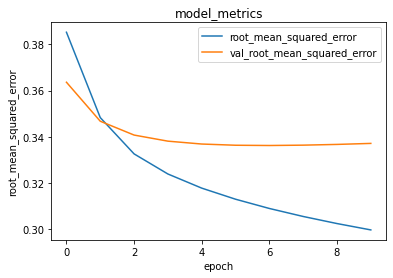

In [66]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['root_mean_squared_error', 'val_root_mean_squared_error'])
plt.show()